# UJIAN TENGAH SEMESTER 2024-2025
# Pembelajaran Mesin
Klasifikasi Neural Network (NN) Pada Data Citra

**Anggota Kelompok :**

**1. Daffa Yudisa Akbar /			NIM. 2241720008**

**2. Hafizh Muhammad Rabbani /	NIM. 2241720242**

**3. Joyo Sugito /				NIM. 2241720050**

**4. Rendy Putra Kusuma /		NIM. 2241720124****

# Intro

Pada UTS ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Casia-Webface (Data dapat diunduh pada Kaggle).
Anda diperbolehkan melakukan eksplorasi terhadap:
1. Metode pra pengolahan
2. Pemilihan fitur
3. Arsitektur ANN
4. Fungsi Aktiviasi
5. Metric Evaluasi

# Preparation

In [1]:
import kagglehub

path = kagglehub.dataset_download("ntl0601/casia-webface")

print("Path to dataset files:", path)

100%|██████████| 2.53G/2.53G [00:11<00:00, 242MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1


In [32]:
'''
    Pada bagian ini Anda dapat memasukkan library yang dibutuhkan
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load Data

In [3]:
'''
    Pada bagian ini Anda dapat memuat dataset Casia-Webface dan visualisasi data.
'''
path = "/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface"

class_names = os.listdir(path)
num_classes = len(class_names)

print("Class names:", class_names)
print("Number of classes:", num_classes)

Class names: ['002413', '006929', '005835', '004009', '005758', '000781', '006524', '009002', '008411', '001663', '000960', '004852', '000712', '000881', '002537', '009581', '007324', '008042', '004478', '002105', '009172', '009635', '008353', '007189', '001883', '004273', '000045', '000725', '010197', '008087', '009582', '009359', '003380', '001457', '003219', '000938', '005561', '001484', '005304', '004326', '001550', '003427', '009835', '007754', '004624', '004747', '009926', '004539', '002886', '008030', '010175', '004707', '006875', '001051', '009239', '005201', '005055', '006558', '008976', '001304', '008375', '005534', '010540', '009516', '005061', '005141', '006137', '008525', '004620', '001677', '002638', '008076', '007537', '009780', '003510', '005563', '004087', '006587', '001667', '001053', '003453', '005600', '007127', '008359', '004130', '001590', '004779', '008345', '009368', '001168', '000840', '000102', '010397', '003243', '006773', '003681', '006617', '005347', '00789

In [4]:
def load_data(data_label, min_images_per_person=100):
  data = []
  label = []
  persons = []

  for idx,person in enumerate(data_label):
    person_path = os.path.join("/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface", person)


    img_files = [f for f in os.listdir(person_path) if f.endswith('.jpg')]

    if len(img_files) < min_images_per_person:
      continue

    label.append(person)

    for img_file in img_files:
      img_path = os.path.join(path, person, img_file)
      img = Image.open(img_path)
      data.append(np.array(img))
      persons.append(person)

  return np.array(data), np.array(label), np.array(persons)

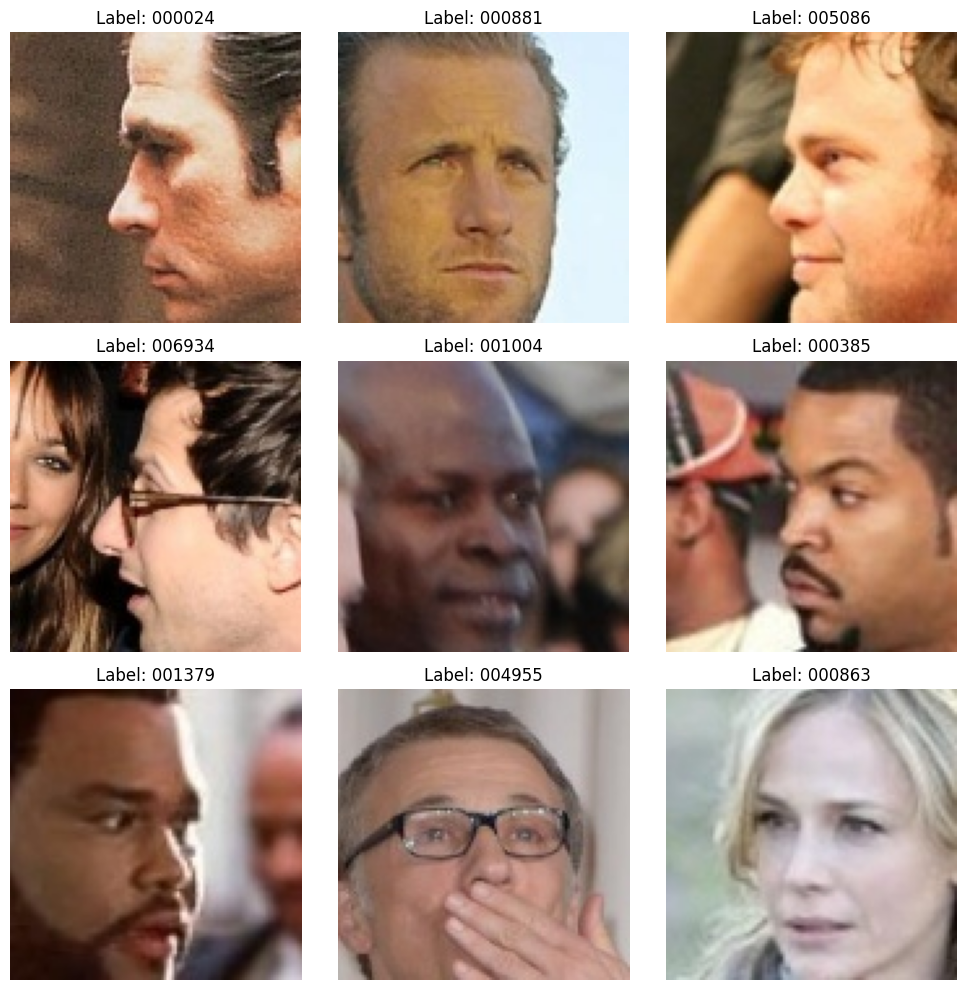

In [5]:
images, labels, persons = load_data(class_names)

import matplotlib.pyplot as plt

def display_images(images, persons, num_images=10):
    grid_size = int(np.sqrt(num_images))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    indices = np.random.choice(len(images), num_images, replace=False)

    for i, ax in enumerate(axes.flat):
        idx = indices[i]
        ax.imshow(images[idx])
        ax.set_title(f"Label: {persons[idx]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

display_images(images, persons, num_images=9)

In [6]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Person shape:", persons.shape)

Images shape: (180600, 112, 112, 3)
Labels shape: (921,)
Person shape: (180600,)


# Preprocessing

In [7]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''
def preprocess_data(images, target_size=(64, 64)):
    processed_images = []

    for img in images:
        img_resized = cv2.resize(img, target_size)
        img_normalized = img_resized / 255.0
        processed_images.append(img_normalized)

    processed_images = np.array(processed_images)
    return processed_images


In [8]:
processed_images = preprocess_data(images, target_size=(64, 64))


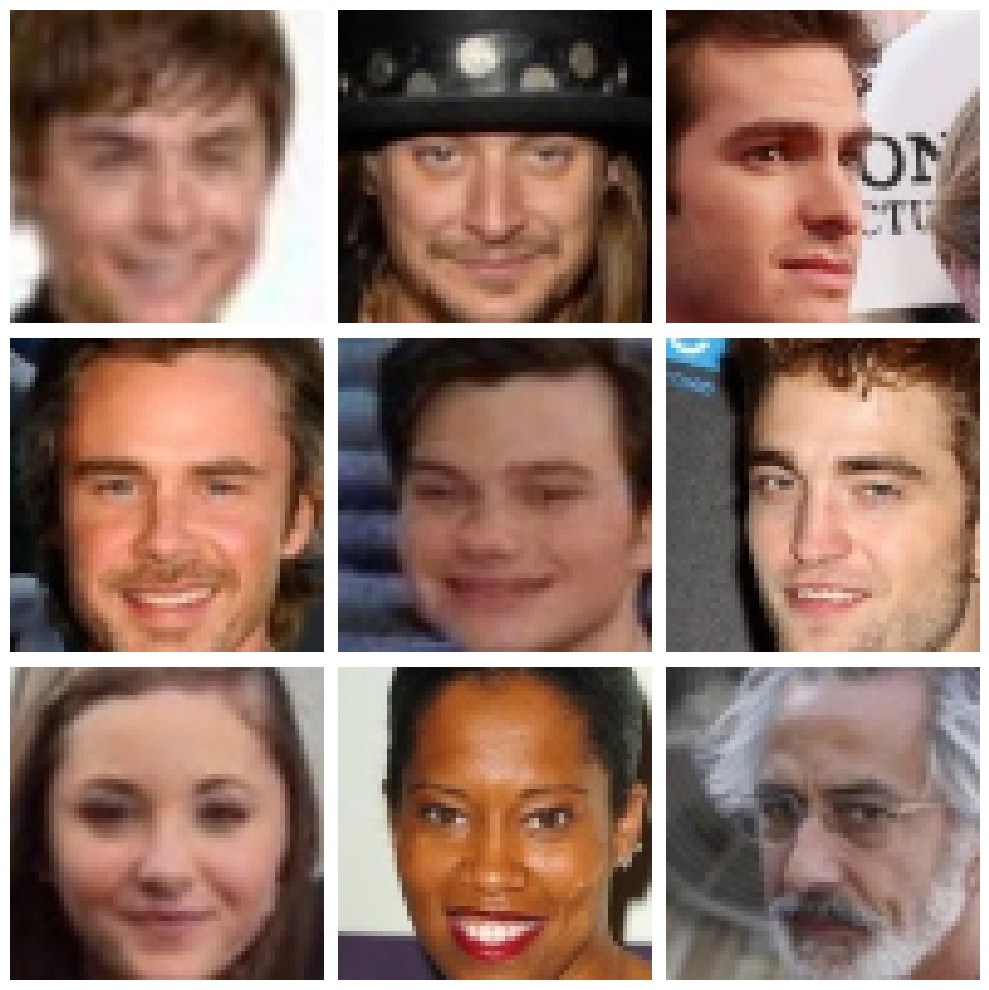

In [9]:
n_cols = 3
n_rows = 3

plt.figure(figsize=(10, 10))

indices = np.random.choice(len(processed_images), size=9)

for i, idx in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(processed_images[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
print("Images shape:", processed_images.shape)
print("Labels shape:", labels.shape)
print("Person shape:", persons.shape)

Images shape: (180600, 64, 64, 3)
Labels shape: (921,)
Person shape: (180600,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(processed_images, persons, test_size=0.2, random_state=42)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print(f"Train Images shape: {X_train.shape}, Train Labels shape: {y_train.shape}")
print(f"Validation Images shape: {X_test.shape}, Validation Labels shape: {y_test.shape}")

Train Images shape: (144480, 64, 64, 3), Train Labels shape: (144480,)
Validation Images shape: (36120, 64, 64, 3), Validation Labels shape: (36120,)


# Build Model

In [36]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan input layer, hidden layer, output layer
    2. Menentukan fungsi aktivasi
    3. Compile Model (Menentukan optimizer, loss, metrics)
    3. Proses fitting model
'''

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile  model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 128)        

**Pada UTS ini digunakan arsitektur CNN karena CNN dirancang khusus untuk mengolah data citra, memungkinkan model untuk secara efektif mengenali pola visual melalui operasi konvolusi yang mengekstrak fitur penting tanpa memerlukan pengolahan manual. Hal ini memungkinkan CNN memanfaatkan hubungan spasial antar piksel, yang krusial dalam klasifikasi citra. Sebaliknya, penggunaan ANN tidak ideal karena model tersebut beroperasi pada data yang diratakan menjadi vektor satu dimensi, menyebabkan hilangnya informasi spasial yang penting dan meningkatkan risiko overfitting.**

---

In [40]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1129/1129 [==============================] - 94s 84ms/step - loss: 3.3206 - accuracy: 0.3445 - val_loss: 2.9611 - val_accuracy: 0.4152
Epoch 2/30
1129/1129 [==============================] - 91s 80ms/step - loss: 2.6062 - accuracy: 0.4778 - val_loss: 2.6085 - val_accuracy: 0.4837
Epoch 3/30
1129/1129 [==============================] - 91s 80ms/step - loss: 2.2403 - accuracy: 0.5471 - val_loss: 2.3179 - val_accuracy: 0.5399
Epoch 4/30
1129/1129 [==============================] - 91s 81ms/step - loss: 2.0011 - accuracy: 0.5933 - val_loss: 2.1360 - val_accuracy: 0.5797
Epoch 5/30
1129/1129 [==============================] - 91s 81ms/step - loss: 1.8215 - accuracy: 0.6280 - val_loss: 2.0283 - val_accuracy: 0.6004
Epoch 6/30
1129/1129 [==============================] - 90s 80ms/step - loss: 1.6924 - accuracy: 0.6518 - val_loss: 2.0135 - val_accuracy: 0.6020
Epoch 7/30
1129/1129 [==============================] - 91s 80ms/step - loss: 1.5926 - accuracy: 0.6694 - val_loss: 1.9294 -

# Evaluation

In [41]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
'''

# Evaluasi model pada data pelatihan
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Train Loss: 0.7182, Train Accuracy: 0.8340
Test Loss: 2.1273, Test Accuracy: 0.6472


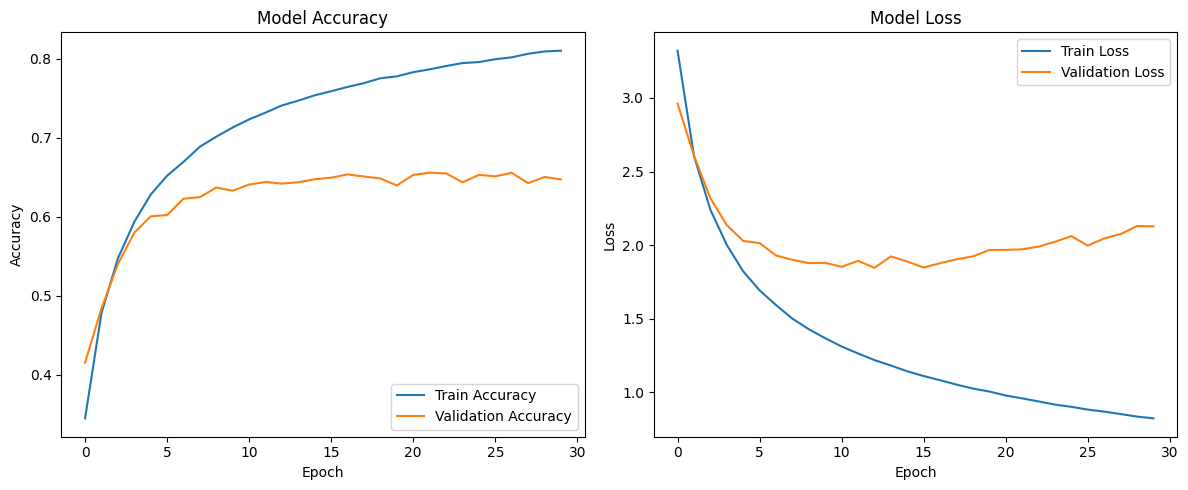

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()